In [304]:
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import sys

In [629]:
def get_test_train_with_header(location):
    location = '~/Documents/SMAI/Assignment2/' + location
    dataframe = pd.read_csv(location)
    #dataframe = dataframe.sample(frac=1).reset_index(drop=True)
    train  = dataframe[:int(0.8*len(dataframe))]
    test = dataframe[int(0.8*len(dataframe)):]
    return test,train

In [279]:
def get_test_train(location):
    location = '~/Documents/SMAI/Assignment2/' + location
    dataframe = pd.read_csv(location,header=None)
    #dataframe = dataframe.sample(frac=1).reset_index(drop=True)
    train  = dataframe[:int(0.8*len(dataframe))]
    test = dataframe[int(0.8*len(dataframe)):]
    return test,train

In [446]:
'''
USED IN LINEAR REGRESSION
'''
def MeanSquaredError(X,B,Y,lamb,reg='L0'):
    m = X.shape[0]
    cost = (1/(m))*np.sum((X.dot(B) - Y)**2)
    return(cost)

In [574]:
'''
USED IN LINEAR REGRESSION
'''
def gradient_descent(X,B,Y,alpha,lamb,reg='L0'):
    m = len(Y)
    cost = 0
    for i in range(1000):
        #print(B)
        if reg == 'L2': 
            bias = B[0]
            B -= alpha*((1/m)*(X.T.dot((X.dot(B) - Y))) + lamb*2*B)
            B[0] = B[0] + alpha*(lamb*2*bias)
        elif reg == 'L1':
            bias = B[0]
            B -= alpha*((1/m)*(X.T.dot((X.dot(B) - Y))) + lamb*np.sign(B))
            B[0] = B[0] + alpha*(lamb*np.sign(bias))
            #print(B[0])
        else:
            B -= alpha*(1/m)*(X.T.dot((X.dot(B) - Y)))
        #cost = cost_function(X,B,Y)
        #print(cost)
    return B,cost

In [620]:
'''
USED IN LINEAR REGRESSION
'''
def predictLinear(test,target,B,lamb,reg='L0'):
    #print(test)
    X = []
    x0 = np.ones(test.shape[0])
    columns = test.shape[1]
    X.append(list(x0))
    for col in range(1,columns):
        if col!=target:
            #print(test[:,col])
            normalized_col = list(((test[:,col]) - np.mean(test[:,col]))/\
                                   ((np.std(test[:,col]))+np.finfo(float).eps))
            X.append(normalized_col)
    #print(X)
    X = np.array(X).T
    Y = np.array(test[:,target])
    predicted_y = X.dot(B)
    #score = r2_score(Y,predicted_y)
    err = MeanSquaredError(X,B,Y,lamb,reg)
    return X,predicted_y,err

In [621]:
'''
USED IN LINEAR REGRESSION
'''
def LinearRegressionFit(test,train,target,lamb,reg='L0'):
    #get X matrx which consists all features
    X = []
    x0 = np.ones(train.shape[0])
    columns = train.shape[1]
    X.append(list(x0))
    for col in range(1,columns):
        if col!=target:
            normalized_col = list(((train[:,col]) - np.mean(train[:,col]))/\
                                   ((np.std(train[:,col]))+np.finfo(float).eps))
            X.append(normalized_col)       
    X = np.array(X).T
    B = np.array(np.zeros(columns-1))
    Y = np.array(train[:,target])
    alpha = 0.01
    B,cost = gradient_descent(X,B,Y,alpha,lamb,reg)
    return(B)

## Question - 1

In [612]:
#location = '~/Documents/SMAI/Assignment2/AdmissionDataset/data.csv'
location = 'AdmissionDataset/data.csv'
test,train = get_test_train_with_header(location)
train = train.values
test = test.values
target = 8
lamb = 0
lambList=[]
errList=[]
valerrList=[]
while lamb<50:
    slopeValues = LinearRegressionFit(np.array(test),np.array(train),target,lamb,'L1')
    X,predicted_y,err = predictLinear(np.array(test),target,slopeValues,lamb,'L1')
    X,predicted_y,verr = predictLinear(np.array(train),target,slopeValues,lamb,'L1')
    lambList.append(lamb)
    errList.append(err)
    valerrList.append(verr)
    #print(err)
    lamb+=0.1

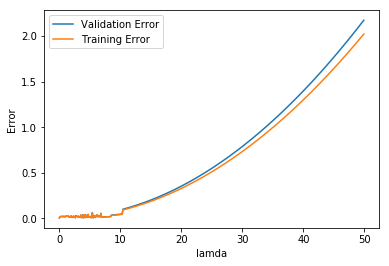

In [613]:
plt.plot(lambList,errList,label="Validation Error")
plt.plot(lambList,valerrList,label = "Training Error")
plt.xlabel("lamda")
plt.ylabel("Error")
plt.legend()
plt.show()

## Question - 2

In [598]:
#location = '~/Documents/SMAI/Assignment2/AdmissionDataset/data.csv'
location = 'AdmissionDataset/data.csv'
test,train = get_test_train_with_header(location)
train = train.values
test = test.values
target = 8
lamb = 0
lambList=[]
errList=[]
valerrList = []
while lamb<50:
    slopeValues = LinearRegressionFit(np.array(test),np.array(train),target,lamb,'L2')
    X,predicted_y,err = predictLinear(np.array(test),target,slopeValues,lamb,'L2')
    #print(err)
    X,predicted_y,verr = predictLinear(np.array(train),target,slopeValues,lamb,'L2')
    lambList.append(lamb)
    errList.append(err)
    valerrList.append(verr)
    lamb+=1
#print("Error : ",err)

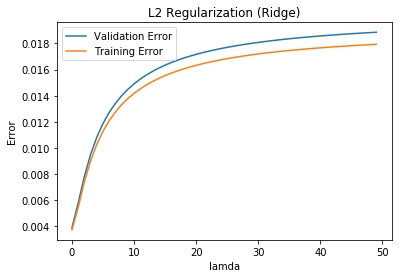

In [599]:
plt.plot(lambList,errList,label='Validation Error')
plt.plot(lambList,valerrList,label = 'Training Error')
plt.xlabel("lamda")
plt.ylabel("Error")
plt.title("L2 Regularization (Ridge)")
plt.legend()
plt.show() 

## Question - 5

In [634]:
location = 'AdmissionDataset/data.csv'
test,train = get_test_train_with_header(location)
train = train.values
target=8
klist = []
acclist = []
for knum in range(2,11,1):
    klist.append(knum)
    kf = KFold(n_splits=knum)
    sumk=0
    size=0
    for train_index, test_index in kf.split(train):
        size = len(train_index)
        trainData = train[train_index]
        testData = train[test_index]
        slopeValues = LinearRegressionFit(testData,trainData,target,0.3,'L2')
        X,predicted_y,err = predictLinear(testData,target,slopeValues,0.3,'L2')
        sumk+=err
    acclist.append(sumK/size)

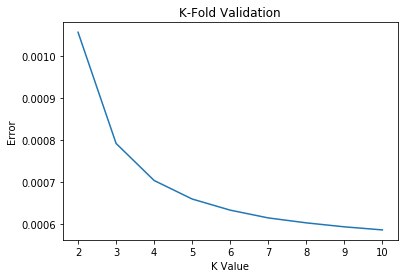

In [635]:
plt.plot(klist,acclist)
plt.xlabel("K Value")
plt.ylabel("Error")
plt.title("K-Fold Validation")
plt.show()

### LOOCV

In [632]:
location = 'AdmissionDataset/data.csv'
test,train = get_test_train_with_header(location)
train = train.values
target=8
klist = []
acclist = []
kf = KFold(n_splits=train.shape[0])
j = 1
for train_index, test_index in kf.split(train):
    klist.append(j)
    size = len(train_index)
    trainData = train[train_index]
    testData = train[test_index]
    slopeValues = LinearRegressionFit(testData,trainData,target,0.3,'L2')
    X,predicted_y,err = predictLinear(testData,target,slopeValues,0.3,'L2')
    acclist.append(err)
    j+=1

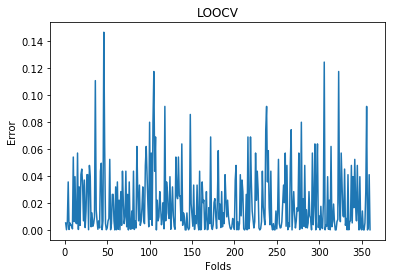

In [633]:
plt.plot(klist,acclist)
plt.xlabel("Folds")
plt.ylabel("Error")
plt.title("LOOCV")
plt.show()